<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 3.9 MB/s eta 0:00:00


In [3]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 75.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61825392 sha256=82293ed39c62509e8001c124846aa5a376bc2d6d9f75bc6904fb0cb8a37f1497
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436764 sha256=b97ff6b7190262eb78c29ab5e7e969bd74a5b29349ed24558054eabc18dc2dca
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [4]:
import pyupbit

In [48]:

import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute15", count=405)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                           open        high         low       close  \
2023-04-18 18:00:00  39077000.0  39107000.0  39060000.0  39068000.0   
2023-04-18 18:15:00  39063000.0  39189000.0  39060000.0  39189000.0   
2023-04-18 18:30:00  39189000.0  39300000.0  39189000.0  39251000.0   
2023-04-18 18:45:00  39254000.0  39300000.0  39231000.0  39231000.0   
2023-04-18 19:00:00  39233000.0  39264000.0  39210000.0  39212000.0   
...                         ...         ...         ...         ...   
2023-04-22 22:00:00  36527000.0  36589000.0  36500000.0  36588000.0   
2023-04-22 22:15:00  36560000.0  36591000.0  36453000.0  36466000.0   
2023-04-22 22:30:00  36466000.0  36495000.0  36397000.0  36429000.0   
2023-04-22 22:45:00  36429000.0  36439000.0  36368000.0  36377000.0   
2023-04-22 23:00:00  36377000.0  36394000.0  36370000.0  36394000.0   

                         volume         value  
2023-04-18 18:00:00   25.174193  9.837252e+08  
2023-04-18 18:15:00   39.609336  1.549740e+09  
202

In [49]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-18 18:00:00,39068000.0
1,2023-04-18 18:15:00,39189000.0
2,2023-04-18 18:30:00,39251000.0
3,2023-04-18 18:45:00,39231000.0
4,2023-04-18 19:00:00,39212000.0
...,...,...
400,2023-04-22 22:00:00,36588000.0
401,2023-04-22 22:15:00,36466000.0
402,2023-04-22 22:30:00,36429000.0
403,2023-04-22 22:45:00,36377000.0


In [50]:
#prophet 불러옴
from fbprophet import Prophet

In [51]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [52]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


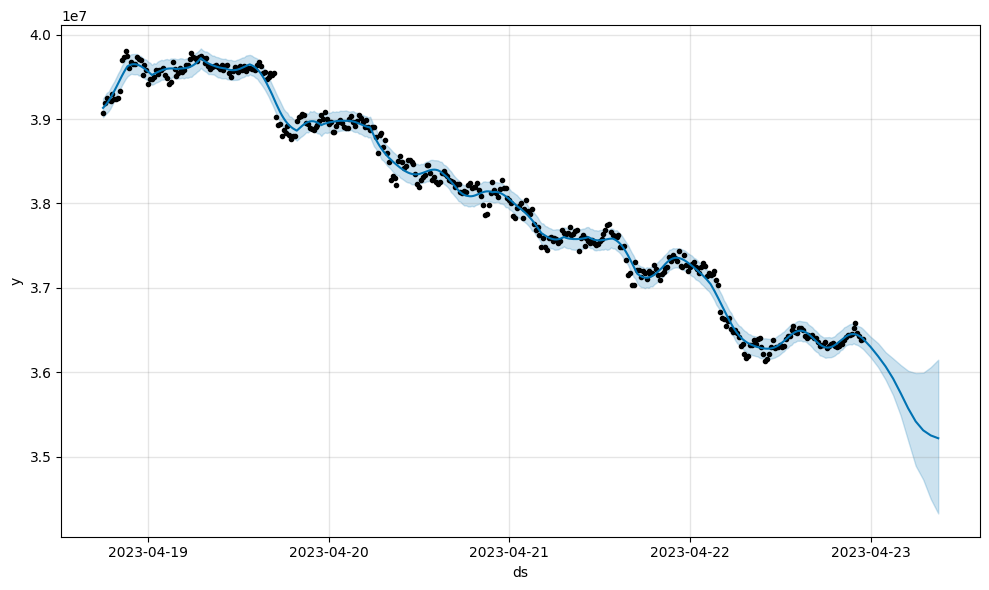

In [53]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


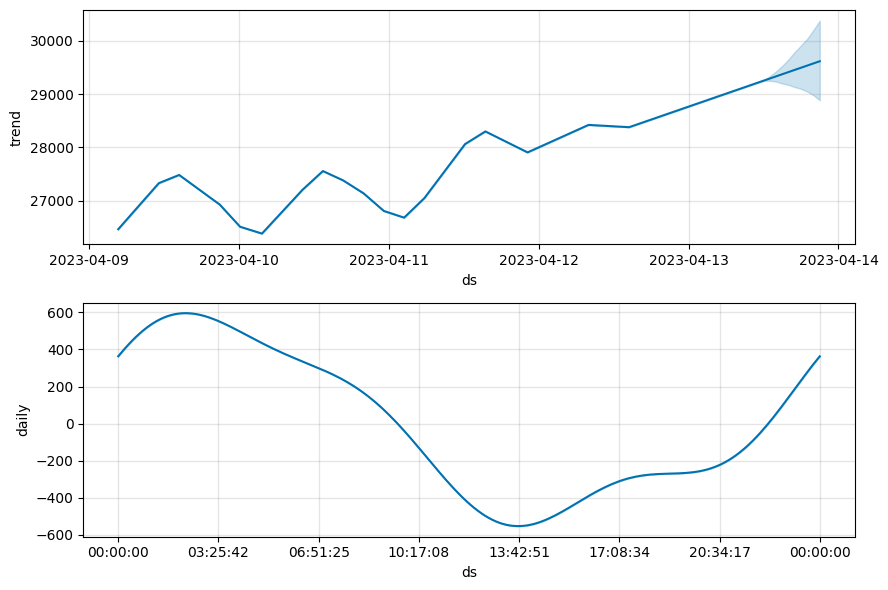

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)

I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive


KeyboardInterrupt: ignored